# Reconocimiento de ropa con redes neuronales
## Objetivo
Entrenar una red neuronal para clasificar imagenes de ropa en 10 categorias (camisetas, zapatos, abrigos, etc.) usando el dataset Fashion MNIST

In [24]:
# Importo librerias
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Divido variables para entrenamiento-pruebas y cargo dataset
(X_entrena, y_entrena), (X_pruebas, y_pruebas) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Preprocesamiento

In [3]:
# Normalizar valores de pixeles entre 0 y 1

X_entrena = X_entrena / 255.0
X_pruebas = X_pruebas / 255.0

# Aplano las imagenes para el MLP (Multilayer Perceptron)
X_entrena = X_entrena.reshape(-1, 28*28)
X_pruebas = X_pruebas.reshape(-1, 28*28)

## Entrenamiento con MLP (Multilayer Perceptron)

In [8]:
model_mlp = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # 10 clases
])

model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.fit(X_entrena, y_entrena, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8190 - loss: 0.5111 - val_accuracy: 0.8591 - val_loss: 0.3915
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8609 - loss: 0.3815 - val_accuracy: 0.8568 - val_loss: 0.3873
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8714 - loss: 0.3427 - val_accuracy: 0.8572 - val_loss: 0.3902
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8815 - loss: 0.3177 - val_accuracy: 0.8767 - val_loss: 0.3418
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8876 - loss: 0.2996 - val_accuracy: 0.8722 - val_loss: 0.3536
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8925 - loss: 0.2859 - val_accuracy: 0.8852 - val_loss: 0.3228
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8996 - loss: 0.2708 - val_accuracy: 0.8781 - val_loss: 0.3432
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9025 - loss: 0.2578 - 

## Entrenamiento con CNN (Convolutional Neural Network)

In [10]:
# Expandir dimensiones para CNN (Canal Unico)
X_entrena_cnn = X_entrena.reshape(-1,28,28,1)
X_pruebas_cnn = X_pruebas.reshape(-1,28,28,1)

model_cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_entrena_cnn, y_entrena, epochs = 10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8217 - loss: 0.4916 - val_accuracy: 0.8737 - val_loss: 0.3614
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8819 - loss: 0.3266 - val_accuracy: 0.8839 - val_loss: 0.3205
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8980 - loss: 0.2809 - val_accuracy: 0.8963 - val_loss: 0.2787
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9084 - loss: 0.2476 - val_accuracy: 0.9072 - val_loss: 0.2563
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9183 - loss: 0.2229 - val_accuracy: 0.9066 - val_loss: 0.2564
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9264 - loss: 0.1998 - val_accuracy: 0.9082 - val_loss: 0.2598
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9328 - loss: 0.1813 - val_accuracy: 0.9137 - val_loss: 0.2420
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9389 - loss: 

## Evaluacion de los modelos

In [13]:
# Evalúo porcentaje de precision para el modelo CNN
prueba_perdida, prueba_precision = model_cnn.evaluate(X_pruebas_cnn, y_pruebas)
print(f'Precision en pruebas: {prueba_precision*100:.2f}% ')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9039 - loss: 0.2897
Precision en pruebas: 90.39% 


In [14]:
# Evalúo porcentaje de precision para el modelo MLP
prueba_perdida, prueba_precision = model_mlp.evaluate(X_pruebas, y_pruebas)
print(f'Precision en pruebas: {prueba_precision*100:.2f}% ')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8721 - loss: 0.3691
Precision en pruebas: 87.21% 


## ¿Que arquitectura se comporto mejor: MLP o CNN?
El modelo con mayor precision en pruebas, tiene mejor rendimiento general. Y en la mayoria de los casos **CNN supera a MLP** porque capta patrones espaciales.
* **CNN** tuvo mejore precision con 90.39%

### Visualizar que clase se confunde mas en cada arquitectura

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


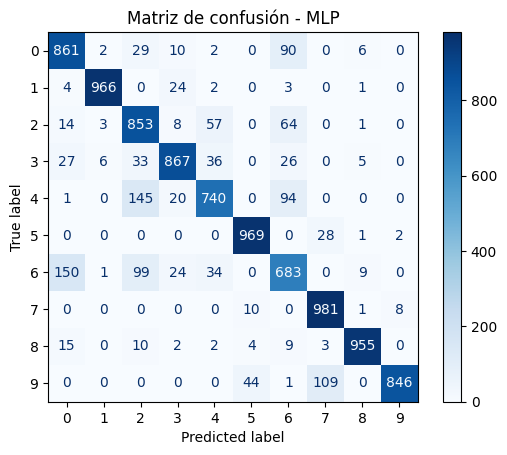

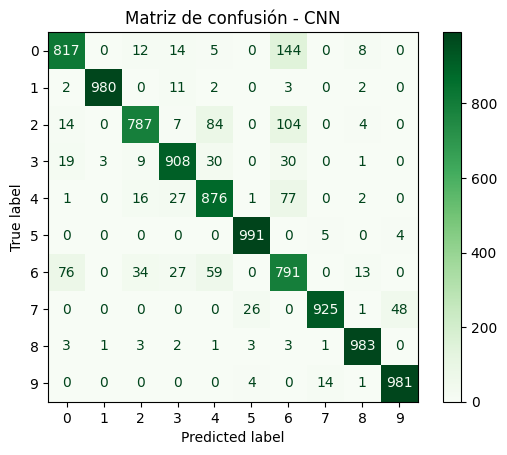

In [21]:
y_predicciones_mlp = np.argmax(model_mlp.predict(X_pruebas), axis = 1)
y_predicciones_cnn = np.argmax(model_cnn.predict(X_pruebas_cnn), axis = 1)

# Matriz MLP
cm_mlp = confusion_matrix(y_pruebas, y_predicciones_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp_mlp.plot(cmap='Blues')
plt.title("Matriz de confusión - MLP")
plt.show()

# Matriz CNN
cm_cnn = confusion_matrix(y_pruebas, y_predicciones_cnn)
disp_cnn = ConfusionMatrixDisplay(cm_cnn)
disp_cnn.plot(cmap='Greens')
plt.title("Matriz de confusión - CNN")
plt.show()

## Visualización de predicciones

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


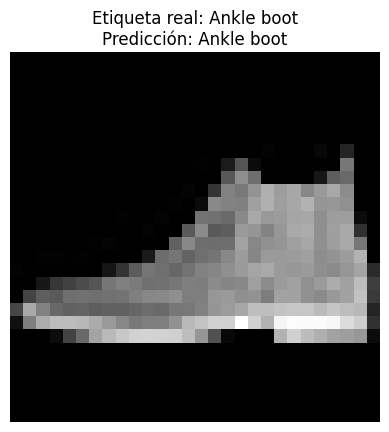

In [18]:
predicciones = model_cnn.predict(X_entrena_cnn)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def _to_2d_image(img):
    # Aplanada 1D -> intentar rearmar 28x28 o 8x8
    if img.ndim == 1:
        if img.size == 28*28:
            return img.reshape(28, 28)
        if img.size == 8*8:
            return img.reshape(8, 8)
        raise ValueError(f"No se reconoce el tamaño de la imagen aplanada: {img.size}")
    # Con canal único -> quitar canal
    if img.ndim == 3 and img.shape[-1] == 1:
        return np.squeeze(img, axis=-1)
    # Ya es 2D
    if img.ndim == 2:
        return img
    raise TypeError(f"Shape no soportado para visualización: {img.shape}")

def mostrar_imagen(i):
    img = _to_2d_image(X_pruebas[i])

    # Etiqueta real
    real = y_pruebas[i]
    real_txt = class_names[real] if 'class_names' in globals() and len(class_names) > int(real) else str(real)

    # Predicción (maneja probas/logits o etiqueta directa)
    pred_val = predicciones[i]
    if isinstance(pred_val, (list, np.ndarray)) and np.asarray(pred_val).ndim >= 1:
        pred_idx = int(np.argmax(pred_val))
    else:
        pred_idx = int(pred_val)
    pred_txt = class_names[pred_idx] if 'class_names' in globals() and len(class_names) > pred_idx else str(pred_idx)

    plt.imshow(img, cmap='gray')
    plt.title(f'Etiqueta real: {real_txt}\nPredicción: {pred_txt}')
    plt.axis('off')
    plt.show()


mostrar_imagen(0)

## ¿Que errores de clasificacion se repiten con la arquitectura que obtuvo la mejor precision?
### Visualizar mal clasificados

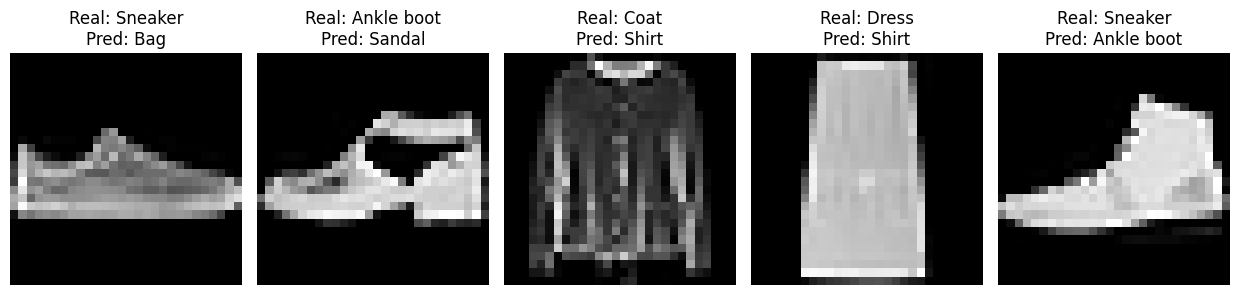

In [23]:
incorrectos = np.where(y_predicciones_cnn != y_pruebas)[0]

def _to_image2d(arr):
    # arr puede ser (H,W), (H,W,1), (H,W,3|4) o (N,)
    if arr.ndim == 2:
        return arr
    if arr.ndim == 3:
        # Si canal único, quitarlo; si RGB/RGBA, devolver tal cual
        if arr.shape[-1] == 1:
            return arr.squeeze(-1)
        if arr.shape[-1] in (3, 4):
            return arr
    if arr.ndim == 1:
        side = int(np.sqrt(arr.size))
        if side * side == arr.size:
            return arr.reshape(side, side)
        # Si no es cuadrado perfecto, no se puede dibujar como imagen 2D
        raise ValueError(f"No se puede inferir forma 2D a partir de vector de tamaño {arr.size}.")
    raise ValueError(f"Forma de imagen no soportada: {arr.shape}")

incorrectos = np.where(y_predicciones_cnn != y_pruebas)[0]

n = min(5, len(incorrectos))
if n == 0:
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    ax.axis('off')
    ax.set_title('Sin errores para mostrar')
else:
    fig, axes = plt.subplots(1, n, figsize=(2.5 * n, 3))
    axes = np.atleast_1d(axes)
    for j, i in enumerate(incorrectos[:n]):
        img = _to_image2d(X_pruebas[i])
        axes[j].imshow(img, cmap='gray')
        # Si tienes class_names, úsalo; si no, muestra el índice
        real = class_names[y_pruebas[i]] if 'class_names' in globals() else y_pruebas[i]
        pred = class_names[y_predicciones_cnn[i]] if 'class_names' in globals() else y_predicciones_cnn[i]
        axes[j].set_title(f'Real: {real}\nPred: {pred}')
        axes[j].axis('off')
    plt.tight_layout()

## ¿Qué patrones visuales parecen más dificiles de distinguir?
### Analizar clases con menor precisión

In [26]:
print('Reporte CNN:')
print(classification_report(y_pruebas, y_predicciones_cnn, target_names = class_names))

Reporte CNN:
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.82      0.85      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.91      0.79      0.85      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.83      0.88      0.85      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.69      0.79      0.74      1000
     Sneaker       0.98      0.93      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.95      0.98      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



Al comparar MLP y CNN, observé que la arquitectura convolucional logra mayor precisión y menor confusión entre clases similares. Las matrices de confusión revelaron que prendas como ‘Shirt’ y ‘T-shirt/top’ se confunden con frecuencia, lo cual se confirmó al visualizar ejemplos mal clasificados. El análisis por clase mostró que categorías con formas más definidas como ‘Sneaker’ o ‘Bag’ se clasifican mejor, mientras que las más ambiguas presentan mayor dificultad.

# 👕 Caso práctico: Reconocimiento de ropa con redes neuronales

### 🎯 Objetivo
Entrenar una red neuronal para clasificar imágenes de ropa en 10 categorías, utilizando el dataset Fashion MNIST. Se comparan dos arquitecturas: MLP (Multilayer Perceptron) y CNN (Convolutional Neural Network), evaluando su rendimiento y capacidad de generalización.

---

### 🧪 Pasos realizados

- Carga del dataset `Fashion MNIST` desde `tensorflow.keras.datasets`
- Normalización de imágenes (valores entre 0 y 1)
- Aplanamiento de imágenes para MLP (`28x28 → 784`)
- Expansión de dimensiones para CNN (`28x28x1`)
- Construcción y entrenamiento de modelos MLP y CNN
- Evaluación con accuracy, matriz de confusión y reporte por clase
- Visualización de ejemplos mal clasificados
- Análisis comparativo entre arquitecturas

---

### 📊 Resultados

| Modelo              | Accuracy en test |
|---------------------|------------------|
| MLP                 | 87.21%           |
| CNN                 | 90.39%           |

- La CNN mostró mejor rendimiento general, con mayor capacidad para captar patrones espaciales.
- La matriz de confusión reveló que clases como `Shirt` y `T-shirt/top` se confunden con frecuencia.
- El reporte por clase mostró que categorías como `Sneaker`, `Bag` y `Ankle boot` se clasifican con mayor precisión.
- La visualización de errores permitió identificar patrones ambiguos entre prendas similares.

---

### 💬 Reflexión

> “Este ejercicio me permitió comparar dos arquitecturas de redes neuronales en un problema de clasificación de imágenes. La CNN superó al MLP en precisión y capacidad de generalización, gracias a su habilidad para detectar patrones espaciales. Al analizar los errores de clasificación, observé que prendas con formas similares como ‘Shirt’ y ‘T-shirt/top’ generan confusión, lo cual se refleja en el reporte por clase y la matriz de confusión. Esta práctica me ayudó a entender cómo la estructura del modelo impacta directamente en su rendimiento, y cómo interpretar los resultados para justificar decisiones técnicas.”

---

### 📎 Recursos utilizados

- Dataset: Fashion MNIST (`tensorflow.keras.datasets`)
- Librerías: `TensorFlow`, `NumPy`, `Matplotlib`, `Scikit-Learn`
- Entorno: `Jupyter Notebook`

---

### 📂 Estructura del proyecto

<>
/fashion_mnist_classification/ │ ├── reconocimiento_ropa.ipynb ├── README.md ├── resultados/ │   ├── matriz_confusion_mlp.png │   ├── matriz_confusion_cnn.png │   ├── ejemplos_mal_clasificados.png │   └── reporte_por_clase.tx
